
# Librerías a usar

In [105]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow

In [106]:
# Utilizamos el Drive en Colab para subir los datos a utilizar
# Se eliminan despues de cierto tiempo al subir directamente
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Cargar Datos

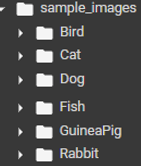

En este caso se cargan los datos con la dirección en donde están alojados, cada uno por separado, debido a pruebas que se realizaron y carencia de tiempo.
Definimos la ruta en la que se encuentran mis datos, se define también un arreglo en el que e van a guardar las imágenes procesadas. Cada carpeta de imágenes se leen y extraen una por una, se le asigna el tamaño de 150px por 150px, luego se procede a ejecutar la función de normalización explicada anteriormente, finalmente, con los datos de la imagen resultante de este proceso se guarda en el arreglo definido como vacío anteriormente. Este proceso se lo realiza para todas las carpetas de imágenes y al final se imprimen los arreglos generados con su cantidad de datos en la carpeta, los pixeles definidos para el tamaño y, tomando en cuenta que se van a utilizar imágenes a color, se preenta el número 3 que representa a RGB.

#Aplicar algún método de ingeniería de características que sea adecuado:

Para este ejercicio se aplico un método de ingeniería de características conocido como *NORMALIZACIÓN* con el fin de escalar los valores de los pixeles en un rango de 0 a 1. Aplicamos las operaciones que se encuentran en la función *normalizar*, que pasamos por parámetro *image*, entonces, cuando se lea una imagen se realizará la siguiente operación, para obtener las imágenes en un rango de -1 a 1.

In [107]:
# Se define una función para la normalización de los datos
def normalizar(image):
  #print("Sin normalizar")
  #print (image)
  img = (image/127)-1
  #print("NORMALIZADO")
  #print(img)
  
  return img

In [108]:
# SE CARGARÁ MANUALMENTE TODOS LOS DATOS

# Cargar datos de BIRD
pandas_folder_path="/content/drive/MyDrive/sample_images/Bird"
bird = []
img_size = 150
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  bird.append(myimageNormalizada)
bird = np.array(bird)
print("BIRD: {}".format(bird.shape))

# Cargar datos de CAT
pandas_folder_path="/content/drive/MyDrive/sample_images/Cat"
cat = []
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))  
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  cat.append(myimageNormalizada)
cat = np.array(cat)
print("CAT: {}".format(cat.shape))

# Cargar datos de DOG
pandas_folder_path="/content/drive/MyDrive/sample_images/Dog"
dog = []
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))  
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  dog.append(myimageNormalizada)
dog = np.array(dog)
print("DOG: {}".format(dog.shape))

# Cargar datos de FISH
pandas_folder_path="/content/drive/MyDrive/sample_images/Fish"
fish = []
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))  
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  fish.append(myimageNormalizada)
fish = np.array(fish)
print("FISH: {}".format(fish.shape))

# Cargar datos de GUINEAPIG
pandas_folder_path="/content/drive/MyDrive/sample_images/GuineaPig"
guineaPig = []
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))  
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  guineaPig.append(myimageNormalizada)
guineaPig = np.array(guineaPig)
print("GUINEAPIG: {}".format(guineaPig.shape))

# Cargar datos de GUINEAPIG
pandas_folder_path="/content/drive/MyDrive/sample_images/Rabbit"
rabbit = []
for img in os.listdir(pandas_folder_path):
  img = cv2.imread(os.path.join(pandas_folder_path, img))
  img_resize = cv2.resize(img,(img_size, img_size))  
  # Se ejecuta la función para normalizar
  myimageNormalizada = normalizar(img_resize)
  rabbit.append(myimageNormalizada)
rabbit = np.array(rabbit)
print("GUINEAPIG: {}".format(rabbit.shape))

BIRD: (81, 150, 150, 3)
CAT: (51, 150, 150, 3)
DOG: (141, 150, 150, 3)
FISH: (52, 150, 150, 3)
GUINEAPIG: (41, 150, 150, 3)
GUINEAPIG: (54, 150, 150, 3)


Como se puede observar, se obtuvieron los arreglos de cada una de las carpetas con las imágenes ya procesadas. Cumpliendo con lo establecido, Todas las imagenes se encuentran normalizadas y de un solo tamaño (150px * 150px) como se lo definió.

El primero número que se emuestra en el array, pertenece al número total de los datos, este no es necesario ya que el formato correcto y que se necesita es solo con los pixeles y el tipo de imagen (b/n = 1 ; color = 3), es decir, es necesario que no se muestre este número. Para esto, se utiliza **np.squeeze(imagen)** y se obtiene:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(150, 150, 3)


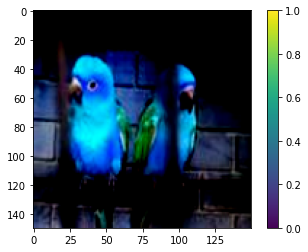

In [109]:
print(bird[4].shape)
plt.figure()
plt.imshow(np.squeeze(bird[4]))
plt.colorbar()
plt.grid(False)
plt.show()

#Concatenar Datos

In [110]:
# Concatenar todos los datos en una lista
total_imagenes = np.concatenate([bird,cat,dog,fish,guineaPig,rabbit])
# Total de imágenes
print(len(total_imagenes))
# Convertir el total de imágenes en un arreglo (array)
Total_imagenes = np.array(total_imagenes)
# Mostrar
print(Total_imagenes.shape)

420
(420, 150, 150, 3)


#Asignar etiquetas manualmente

In [111]:
# ASIGNAR ETIQUETAS A LAS IMÁGENES
# repeat (clase , num de imágenes)
# Asignar etiquetas con repeat a BIRD
etiquetas_bird = np.repeat(0, 81)
# Etiquetas para CAT
etiquetas_cat = np.repeat(1, 51)
# Etiquetas para CAT
etiquetas_dog = np.repeat(2, 141)
# Etiquetas para CAT
etiquetas_fish = np.repeat(3, 52)
# Etiquetas para CAT
etiquetas_guineaPig = np.repeat(4, 41)
# Etiquetas para CAT
etiquetas_rabbit = np.repeat(5, 54)

In [112]:
# Unir etiquetas en una sola lista
etiquetas = np.concatenate([etiquetas_bird, etiquetas_cat, etiquetas_dog, 
                            etiquetas_fish, etiquetas_guineaPig, etiquetas_rabbit])
print(len(etiquetas))

# Convertimos a un array
Etiquetas = np.array(etiquetas)
print(Etiquetas.shape)

420
(420,)


#Nombre de las clases

In [113]:
class_names=['Bird','Cat','Dog','Fish','Guinea Pig','Rabbit']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

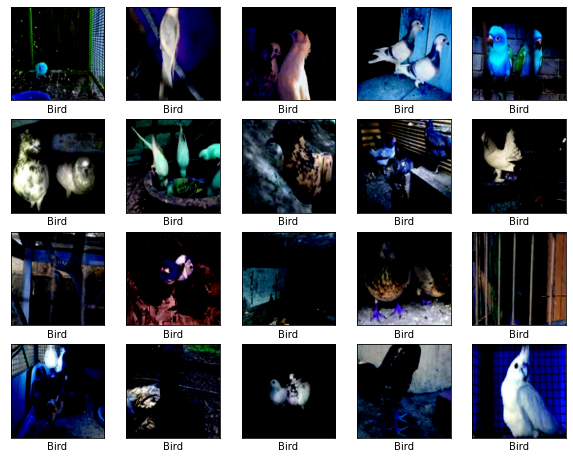

In [114]:
#Se imprimen algunas imagenes ya procesadas
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Total_imagenes[i])
  plt.xlabel(class_names[Etiquetas[i]])
plt.show()

#Definir "X" e "y"

In [115]:
X = Total_imagenes
y = Etiquetas

#Divir datos para el entrenamiento 70% y para el test 30%

In [116]:
# Divir datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
print("Entrenammiento: {}".format(X_train.shape, y_train.shape))
print("Pruebas: {}".format(X_test.shape, y_test.shape))

Entrenammiento: (294, 150, 150, 3)
Pruebas: (126, 150, 150, 3)
